In [ ]:
import numpy as np
from math import log
import pandas as pd

*def entropy(v):*

Where parameter v is a column

Solves for entropy H(x) with the formula:
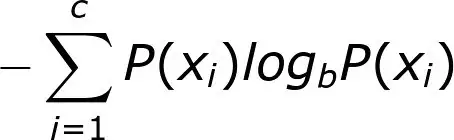

In [ ]:
def entropy(v):
  sum_pi_log_pi = 0
  if np.unique(v).size == 1:
    return 0
  for i in np.unique(v):
    p_i = ((v==i).sum()) / v.size #probability of ith unique
    log_p_i = log(p_i, np.unique(v).size) #base of log correspondence
    sum_pi_log_pi += p_i*log_p_i
  return - sum_pi_log_pi

def expected_entropy(x,y, factor=False)

Where parameters x and y are two columns

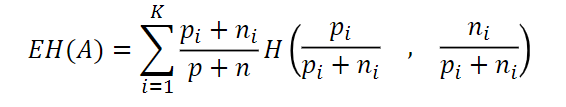



In [ ]:
def expected_entropy(x,y, factor=False):
  exp_entropy = 0
  split_points = []
  if factor:
    for xi in np.unique(x):
      y_xi = y[x==xi]
      ent_y_xi = entropy(y_xi)
      exp_entropy += (y_xi.size / y.size) * ent_y_xi
      split_points.append(xi)
  else:
    split_points.append(sum(x) / x.size)
    y_xi_right = y[x > split_points[0]]
    y_xi_right_weight = y_xi_right.size / y.size

    y_xi_left = y[x <= split_points[0]]
    y_xi_left_weight = y_xi_left.size / y.size
    exp_entropy = y_xi_left_weight * entropy(y_xi_left) + y_xi_right_weight * entropy(y_xi_right)
    return exp_entropy, split_points


*def info_gain(data,target)*

Returns the information gain for a specific column.
Formula: entropy - expected entropy

In [ ]:
def info_gain(data, target):
  entropy1 = entropy(target)
  exp_entropy, split_points = expected_entropy(data, target)
  information_gain = entropy1-exp_entropy
  return information_gain, split_points

*def max_ig_search(df):*

Searches for the variable that gives the highest information gain

In [ ]:
def max_ig_search(df):
  print(df)
  max_ig_var = None
  max_ig_val = 0 
  max_ig_v_split_points = []
  for x in df.columns:
    if x == 'Target':
      continue
    ig, split_points = info_gain(df[x], df.Target)
    if ig > max_ig_val:
      max_ig_val, max_ig_var, max_ig_v_split_points = ig, x, split_points
 
  if max_ig_var == 'x2':
    print(max_ig_val, max_ig_var, max_ig_v_split_points)
    plot_line(x1=min(df.x1), x2=max(df.x1), y1=max_ig_v_split_points[0], y2=max_ig_v_split_points[0])
  if max_ig_var == 'x1':
    print(max_ig_val, max_ig_var, max_ig_v_split_points)
    plot_line(x1=max_ig_v_split_points[0], x2=max_ig_v_split_points[0], y1=0, y2=max(df.x2))

  for split_point in max_ig_v_split_points:
    right = df[df[max_ig_var] <= split_point]
    left = df[df[max_ig_var] > split_point]
    if right.Target.unique().size > 1:
      max_ig_search(right)
    if left.Target.unique().size > 1:
      max_ig_search(left)

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
def plot_data(df):
  plt.scatter(df[df.Target ==1].x1, df[df.Target==1].x2, label='1')
  plt.scatter(df[df.Target ==0].x1, df[df.Target==1].x2, label='0')
  plt.legend()
  plt.xlabel('x1')
  plt.ylabel('x2')
  plt.show()

In [ ]:
def plot_line(x1,x2,y1,y2):
  plt.plot([x1, x2], [y1, y2], 'r')

In [ ]:
df = pd.DataFrame(data=[[2.50, 2.05, 0],[1.2,5.92,1],[2.5,4.92,1], [4.00,4.92,0],[3.52,1.48,0], [2.86,4.21,1]], columns=['x1', 'x2', 'Target'])

Entropy: 1.0
     x1    x2  Target
0  2.50  2.05       0
1  1.20  5.92       1
2  2.50  4.92       1
3  4.00  4.92       0
4  3.52  1.48       0
5  2.86  4.21       1
0.4591479170272448 x2 [3.9166666666666674]
     x1    x2  Target
1  1.20  5.92       1
2  2.50  4.92       1
3  4.00  4.92       0
5  2.86  4.21       1
0.31127812445913283 x1 [2.64]
     x1    x2  Target
3  4.00  4.92       0
5  2.86  4.21       1
1.0 x1 [3.4299999999999997]
Highest info gain: None


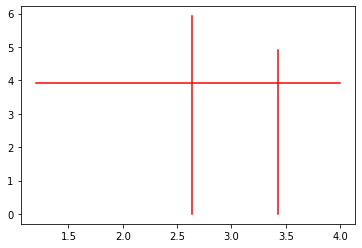

In [ ]:
print('Entropy:', entropy(df['Target']))
print('Highest info gain:', max_ig_search(df))

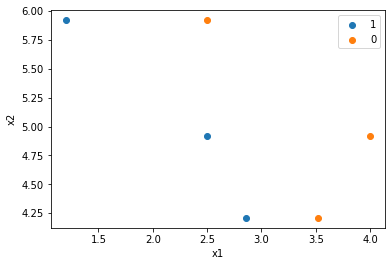

In [ ]:
plot_data(df)

In [ ]:
t= np.array([1,1,0,1,0,])
r= np.array([1,1,0,0,0])
#print(expected_entropy(t,r))
print(entropy(df['x2']))

0.9697238998682474


In [ ]:
df = pd.DataFrame(data=[[1,3.2,16.9],[1,2.9,15.6],[1,1.9,11.2],[1,3.5,14.5],[1,1.1,12.2],[1,2.3,13.7]], columns=['x0', 'x1', 'Target'])

print(info_gain(df.x1, df.Target))

(0.0032289436203634114, [0.625])
